# Installation
First, let's install PyTorch and related libraries

# Import Libraries

In [1]:
import torch
from torch import nn
import torch
import numpy as np
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.models import resnet18
from torchvision.models import ResNet18_Weights

resnet18_model = resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [2]:
# Display model architecture
resnet18_model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

# Data Transforms
## Convert data to tensor and Data augmentation

In [3]:
# Define transforms for training with data augmentation
train_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
]) 

# Define transforms for validation and testing
eval_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
]) 

# Load Data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from torch.optim import lr_scheduler
from tqdm.auto import tqdm
from PIL import Image

train_data = datasets.ImageFolder(root="D:/graduation project depi/data/train",
                                  transform=train_transform, 
                                  target_transform=None) 

test_data = datasets.ImageFolder(root="D:/graduation project depi/data/test",
                                 transform=eval_transform)

validation_data = datasets.ImageFolder(root="D:/graduation project depi/data/valid",
                                 transform=eval_transform)
train_data, test_data, validation_data

<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ELZAHBIA\AppData\Local\Temp\ipykernel_23652\3909231140.py:12: SyntaxWarning: invalid escape sequence '\d'
  test_data = datasets.ImageFolder(root="D:/depi project\data/test",
c:\Users\ELZAHBIA\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(Dataset ImageFolder
     Number of datapoints: 613
     Root location: D:/depi project/data/train
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
                RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
                ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=None, hue=None)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ),
 Dataset ImageFolder
     Number of datapoints: 315
     Root location: D:/depi project\data/test
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
  

In [5]:
# Check a random sample from the dataset
train_data[np.random.randint(0, len(train_data))]

(tensor([[[-1.0219, -0.9877, -1.0048,  ..., -1.8268, -1.8268, -1.8268],
          [-0.9705, -0.9705, -0.9877,  ..., -1.8268, -1.8268, -1.8268],
          [-0.9877, -1.0219, -1.0048,  ..., -1.0048, -1.0562, -1.0390],
          ...,
          [-0.9363, -0.9192, -0.6281,  ..., -0.8164, -0.6109, -0.2684],
          [-0.7308, -0.8164, -0.8678,  ...,  0.0398,  0.5707,  0.3309],
          [-0.7137, -0.7822, -0.7479,  ...,  0.1768, -0.2684, -0.7137]],
 
         [[-0.9153, -0.8803, -0.8978,  ..., -1.7381, -1.7381, -1.7381],
          [-0.8627, -0.8627, -0.8803,  ..., -1.7381, -1.7381, -1.7381],
          [-0.8803, -0.9153, -0.8978,  ..., -0.8978, -0.9503, -0.9328],
          ...,
          [-0.8277, -0.8102, -0.5126,  ..., -0.7052, -0.4951, -0.1450],
          [-0.6176, -0.7052, -0.7577,  ...,  0.1702,  0.7129,  0.4678],
          [-0.6001, -0.6702, -0.6352,  ...,  0.3102, -0.1450, -0.6001]],
 
         [[-0.6890, -0.6541, -0.6715,  ..., -1.5081, -1.5081, -1.5081],
          [-0.6367, -0.6367,

In [6]:
len(train_data), len(test_data), len(validation_data)

(613, 315, 72)

In [7]:
# Get class names
class_names = train_data.classes
class_names

['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa',
 'normal',
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']

In [8]:
# Get class to index mapping
class_dict = train_data.class_to_idx
class_dict

{'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 0,
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 1,
 'normal': 2,
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 3}

In [9]:
# Clean up class names to make them more readable
old_key1 = 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'
new_key1 = 'adenocarcinoma_left.lower.lobe'

old_key2 = 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa'
new_key2 = 'large.cell.carcinoma_left.hilum'

old_key3 = 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa'
new_key3 = 'squamous.cell.carcinoma_left.hilum'

# Update the keys in class_dict
if old_key1 in class_dict:
    class_dict[new_key1] = class_dict[old_key1]
    del class_dict[old_key1]

if old_key2 in class_dict:
    class_dict[new_key2] = class_dict[old_key2]
    del class_dict[old_key2]

if old_key3 in class_dict:
    class_dict[new_key3] = class_dict[old_key3]
    del class_dict[old_key3]

print(class_dict)

{'normal': 2, 'adenocarcinoma_left.lower.lobe': 0, 'large.cell.carcinoma_left.hilum': 1, 'squamous.cell.carcinoma_left.hilum': 3}


In [10]:
# Update class names
for i, name in enumerate(class_names):
    if name == old_key1:
        class_names[i] = new_key1
    elif name == old_key2:
        class_names[i] = new_key2
    elif name == old_key3:
        class_names[i] = new_key3

class_names

['adenocarcinoma_left.lower.lobe',
 'large.cell.carcinoma_left.hilum',
 'normal',
 'squamous.cell.carcinoma_left.hilum']

In [11]:
# Display a random image tensor and its metadata
random_idx = torch.randint(0, len(train_data), size=(1,)).item()
img, label = train_data[random_idx][0], train_data[random_idx][1]

print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")
print(f"Class name: {class_names[label]}")

Image shape: torch.Size([3, 224, 224])
Image datatype: torch.float32
Image label: 3
Label datatype: <class 'int'>
Class name: squamous.cell.carcinoma_left.hilum


# Visualize Data

Text(0.5, 1.0, 'adenocarcinoma_left.lower.lobe')

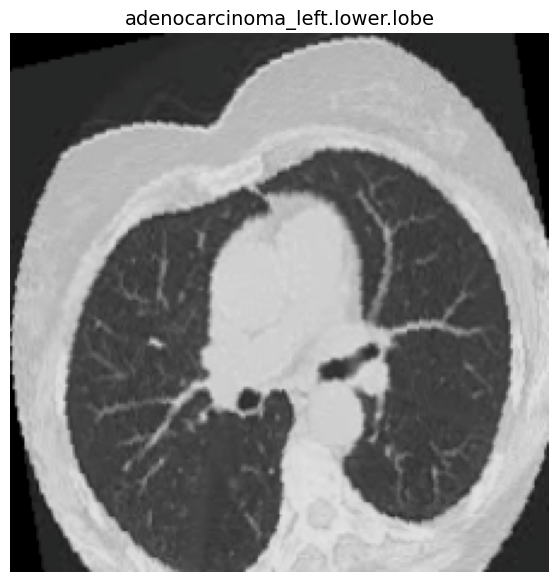

In [12]:
# Function to denormalize image for visualization
def denormalize(tensor):
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
    return tensor * std + mean

# Display a random training image
random_idx = torch.randint(0, len(train_data), size=(1,)).item()
img, label = train_data[random_idx][0], train_data[random_idx][1]

# Denormalize the image
img_display = denormalize(img)

# Convert to a format suitable for matplotlib
img_display = img_display.permute(1, 2, 0).clamp(0, 1).numpy()

plt.figure(figsize=(12, 7))
plt.imshow(img_display)
plt.axis("off")
plt.title(class_names[label], fontsize=14)

In [13]:
# Create data loaders
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=2,
                              shuffle=True,
                              pin_memory=True if torch.cuda.is_available() else False)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=2,
                             shuffle=False,
                             pin_memory=True if torch.cuda.is_available() else False)

val_dataloader = DataLoader(dataset=validation_data,
                             batch_size=BATCH_SIZE,
                             num_workers=2,
                             shuffle=False,
                             pin_memory=True if torch.cuda.is_available() else False)

print(f"Number of batches in train dataloader: {len(train_dataloader)}")
print(f"Number of batches in test dataloader: {len(test_dataloader)}")
print(f"Number of batches in validation dataloader: {len(val_dataloader)}")

Number of batches in train dataloader: 20
Number of batches in test dataloader: 10
Number of batches in validation dataloader: 3


# Build Model

In [14]:
# Modify the final fully connected layer for our classification task
resnet18_model.fc = nn.Sequential(
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(256, len(class_names))
)

# Move model to the appropriate device
resnet18_model = resnet18_model.to(device)

resnet18_model.fc

Sequential(
  (0): Linear(in_features=512, out_features=512, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.3, inplace=False)
  (3): Linear(in_features=512, out_features=256, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.2, inplace=False)
  (6): Linear(in_features=256, out_features=4, bias=True)
)

In [15]:
# First convolutional layer stays the same since we're using RGB images (3 channels)
# No need to modify this for RGB images
resnet18_model.conv1 = nn.Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False).to(device)

In [16]:
# Define loss function and optimizer
loss_fn = nn.CrossEntropyLoss()

# Use Adam optimizer with a learning rate scheduler
optimizer = torch.optim.Adam(resnet18_model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)

In [17]:
# Install torchinfo if not already installed
import sys
import subprocess

try:
    from torchinfo import summary
except ImportError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "torchinfo"])
    from torchinfo import summary

# Display model summary
summary(resnet18_model, input_size=(1, 3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [1, 4]                    --
├─Conv2d: 1-1                            [1, 64, 112, 112]         9,408
├─BatchNorm2d: 1-2                       [1, 64, 112, 112]         128
├─ReLU: 1-3                              [1, 64, 112, 112]         --
├─MaxPool2d: 1-4                         [1, 64, 56, 56]           --
├─Sequential: 1-5                        [1, 64, 56, 56]           --
│    └─BasicBlock: 2-1                   [1, 64, 56, 56]           --
│    │    └─Conv2d: 3-1                  [1, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-2             [1, 64, 56, 56]           128
│    │    └─ReLU: 3-3                    [1, 64, 56, 56]           --
│    │    └─Conv2d: 3-4                  [1, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-5             [1, 64, 56, 56]           128
│    │    └─ReLU: 3-6                    [1, 64, 56, 56]           --
│

# Training Functions

In [18]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device):
    model.train()

    train_loss, train_acc = 0, 0
    
    # Create progress bar
    progress_bar = tqdm(dataloader, desc="Training", leave=False)

    for batch, (X, y) in enumerate(progress_bar):
        X, y = X.to(device), y.to(device)

        # Forward pass
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item() / len(y_pred)
        
        # Update progress bar
        progress_bar.set_postfix(loss=loss.item(), acc=(y_pred_class == y).sum().item() / len(y_pred))

    # Calculate averages
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [19]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
    model.eval()

    test_loss, test_acc = 0, 0
    y_pred_list = []
    y_true_list = []

    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)

            # Forward pass
            test_pred_logits = model(X)
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item() / len(test_pred_labels))
            
            # Store predictions and true labels for confusion matrix
            y_pred_list.extend(test_pred_labels.cpu().numpy())
            y_true_list.extend(y.cpu().numpy())

    # Calculate averages
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc, y_pred_list, y_true_list

In [20]:
def train(model: torch.nn.Module,
          train_dataloader,
          test_dataloader,
          val_dataloader,
          optimizer,
          scheduler,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device=device):
    
    results = {"train_loss": [],
               "train_acc": [],
               "val_loss": [],
               "val_acc": [],
               "test_loss": [],
               "test_acc": []}
    
    # Track best validation accuracy
    best_val_acc = 0.0
    
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        
        # Training
        train_loss, train_acc = train_step(model=model,
                                         dataloader=train_dataloader,
                                         loss_fn=loss_fn,
                                         optimizer=optimizer,
                                         device=device)
        
        # Validation
        val_loss, val_acc, _, _ = test_step(model=model,
                                         dataloader=val_dataloader,
                                         loss_fn=loss_fn,
                                         device=device)
        
        # Update learning rate based on validation loss
        scheduler.step(val_loss)
        
        # Save best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), "best_model.pth")
            print(f"New best model saved with validation accuracy: {best_val_acc:.4f}")
        
        # Test (optional, could be skipped during training)
        test_loss, test_acc, _, _ = test_step(model=model,
                                           dataloader=test_dataloader,
                                           loss_fn=loss_fn,
                                           device=device)
        
        print(f"Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f}")
        print(f"Val loss: {val_loss:.4f} | Val acc: {val_acc:.4f}")
        print(f"Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")
        print("-" * 50)

        # Store results
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["val_loss"].append(val_loss)
        results["val_acc"].append(val_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
    
    # Load best model for final evaluation
    model.load_state_dict(torch.load("best_model.pth"))
    print(f"Loaded best model with validation accuracy: {best_val_acc:.4f}")
    
    return results, model

In [21]:
# Set number of epochs
NUM_EPOCHS = 15

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train the model
model_results, trained_model = train(model=resnet18_model,
                                    train_dataloader=train_dataloader,
                                    test_dataloader=test_dataloader,
                                    val_dataloader=val_dataloader,
                                    optimizer=optimizer,
                                    scheduler=scheduler,
                                    loss_fn=loss_fn,
                                    epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

Epoch 1/15


New best model saved with validation accuracy: 0.2812
Train loss: 1.0896 | Train acc: 0.5106
Val loss: 1.6030 | Val acc: 0.2812
Test loss: 2.1891 | Test acc: 0.2398
--------------------------------------------------
Epoch 2/15


New best model saved with validation accuracy: 0.3438
Train loss: 0.9836 | Train acc: 0.5628
Val loss: 1.0699 | Val acc: 0.3438
Test loss: 0.9184 | Test acc: 0.5344
--------------------------------------------------
Epoch 3/15


New best model saved with validation accuracy: 0.3854
Train loss: 0.9357 | Train acc: 0.5728
Val loss: 1.3599 | Val acc: 0.3854
Test loss: 4.9605 | Test acc: 0.1812
--------------------------------------------------
Epoch 4/15


Train loss: 0.9509 | Train acc: 0.6097
Val loss: 1.8479 | Val acc: 0.3542
Test loss: 1.6298 | Test acc: 0.4171
--------------------------------------------------
Epoch 5/15


Train loss: 0.9286 | Train acc: 0.5856
Val loss: 1.5456 | Val acc: 0.3021
Test loss: 1.4155 | Test acc: 0.4603
--------------------------------------------------
Epoch 6/15


New best model saved with validation accuracy: 0.5312
Train loss: 0.7919 | Train acc: 0.6472
Val loss: 1.1412 | Val acc: 0.5312
Test loss: 1.5436 | Test acc: 0.3950
--------------------------------------------------
Epoch 7/15


Train loss: 0.6867 | Train acc: 0.7197
Val loss: 0.8302 | Val acc: 0.5104
Test loss: 0.9490 | Test acc: 0.5333
--------------------------------------------------
Epoch 8/15


New best model saved with validation accuracy: 0.5833
Train loss: 0.6280 | Train acc: 0.7388
Val loss: 0.7729 | Val acc: 0.5833
Test loss: 0.9272 | Test acc: 0.5706
--------------------------------------------------
Epoch 9/15


Train loss: 0.5557 | Train acc: 0.7909
Val loss: 0.7387 | Val acc: 0.5833
Test loss: 0.9601 | Test acc: 0.5464
--------------------------------------------------
Epoch 10/15


New best model saved with validation accuracy: 0.7083
Train loss: 0.5335 | Train acc: 0.7847
Val loss: 0.7008 | Val acc: 0.7083
Test loss: 1.1362 | Test acc: 0.5083
--------------------------------------------------
Epoch 11/15


Train loss: 0.4716 | Train acc: 0.8297
Val loss: 0.6520 | Val acc: 0.6458
Test loss: 1.0091 | Test acc: 0.5521
--------------------------------------------------
Epoch 12/15


Train loss: 0.4468 | Train acc: 0.8128
Val loss: 0.6579 | Val acc: 0.6979
Test loss: 0.8436 | Test acc: 0.6314
--------------------------------------------------
Epoch 13/15


New best model saved with validation accuracy: 0.7500
Train loss: 0.4665 | Train acc: 0.8012
Val loss: 0.6201 | Val acc: 0.7500
Test loss: 0.7488 | Test acc: 0.6524
--------------------------------------------------
Epoch 14/15


New best model saved with validation accuracy: 0.7604
Train loss: 0.4793 | Train acc: 0.8278
Val loss: 0.5871 | Val acc: 0.7604
Test loss: 1.2364 | Test acc: 0.5228
--------------------------------------------------
Epoch 15/15


New best model saved with validation accuracy: 0.7917
Train loss: 0.4032 | Train acc: 0.8422
Val loss: 0.5743 | Val acc: 0.7917
Test loss: 1.2033 | Test acc: 0.5189
--------------------------------------------------
Loaded best model with validation accuracy: 0.7917
Total training time: 540.159 seconds


# Visualize Training Results

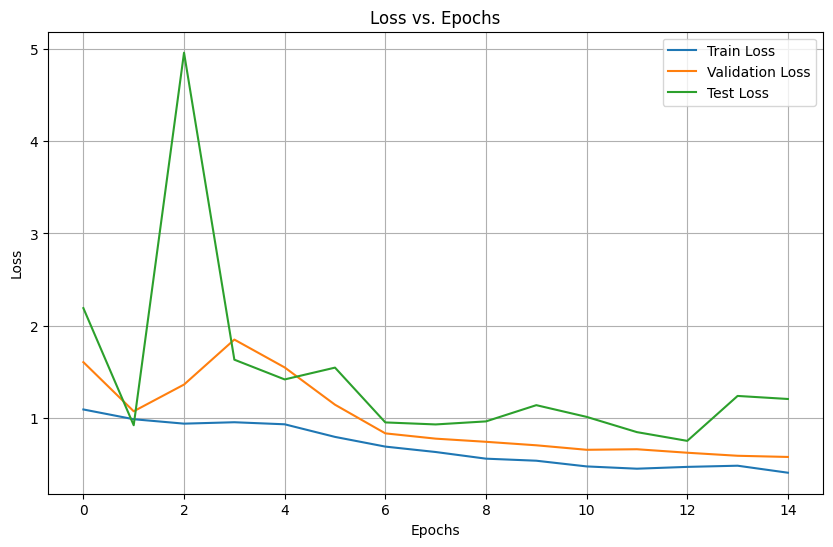

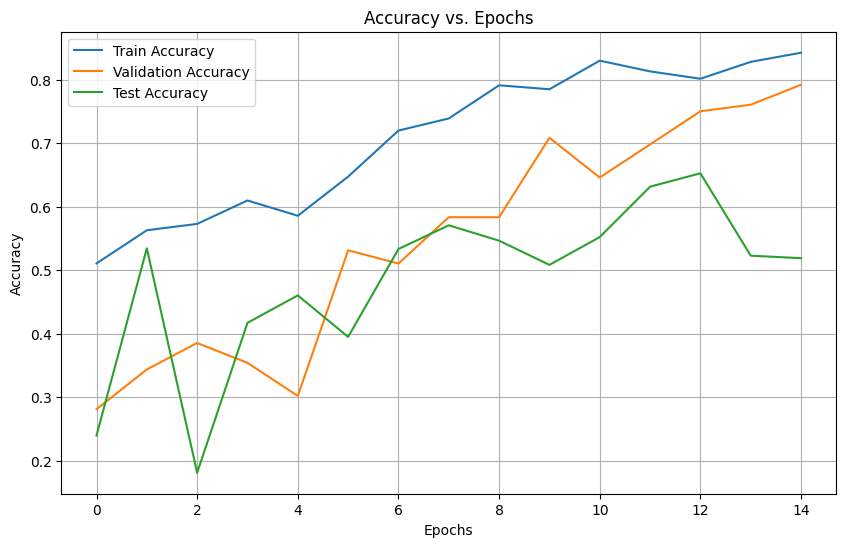

In [22]:
# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(model_results["train_loss"], label="Train Loss")
plt.plot(model_results["val_loss"], label="Validation Loss")
plt.plot(model_results["test_loss"], label="Test Loss")
plt.title("Loss vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(model_results["train_acc"], label="Train Accuracy")
plt.plot(model_results["val_acc"], label="Validation Accuracy")
plt.plot(model_results["test_acc"], label="Test Accuracy")
plt.title("Accuracy vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Final Model Evaluation

Final Test Loss: 1.2033
Final Test Accuracy: 0.5189


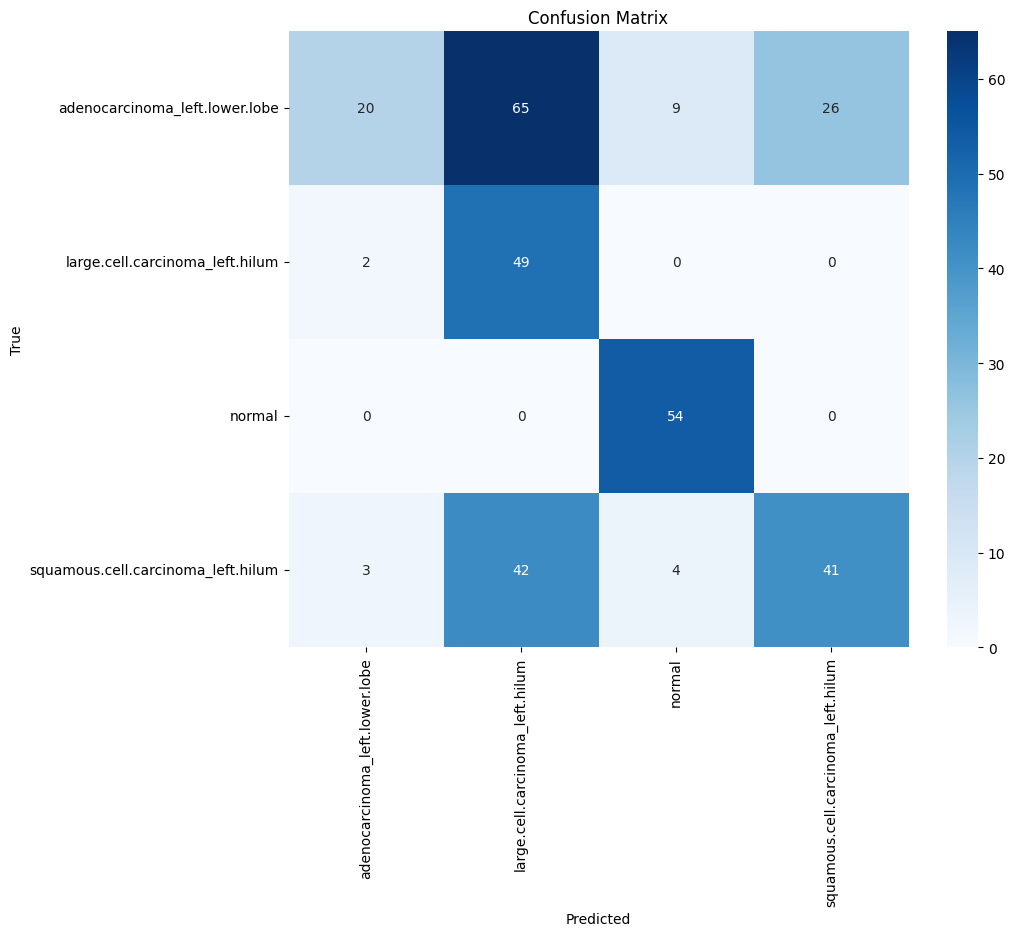

Classification Report:
                                    precision    recall  f1-score   support

    adenocarcinoma_left.lower.lobe       0.80      0.17      0.28       120
   large.cell.carcinoma_left.hilum       0.31      0.96      0.47        51
                            normal       0.81      1.00      0.89        54
squamous.cell.carcinoma_left.hilum       0.61      0.46      0.52        90

                          accuracy                           0.52       315
                         macro avg       0.63      0.65      0.54       315
                      weighted avg       0.67      0.52      0.48       315



In [23]:
# Evaluate the model on the test set and generate confusion matrix
test_loss, test_acc, y_pred, y_true = test_step(model=trained_model,
                                          dataloader=test_dataloader,
                                          loss_fn=loss_fn,
                                          device=device)

print(f"Final Test Loss: {test_loss:.4f}")
print(f"Final Test Accuracy: {test_acc:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print classification report
print("Classification Report:")
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

## Saving Model

In [24]:
# Save the final model
torch.save(trained_model.state_dict(), "chest-ctscan_model.pth")

# Save class names for future use
import json
with open('class_names.json', 'w') as f:
    json.dump(class_names, f)

print("Model and class names saved successfully.")

Model and class names saved successfully.


# Model Inference

Using sample image from class: large.cell.carcinoma_left.hilum
Predicted Class: large.cell.carcinoma_left.hilum
Confidence: 0.5311


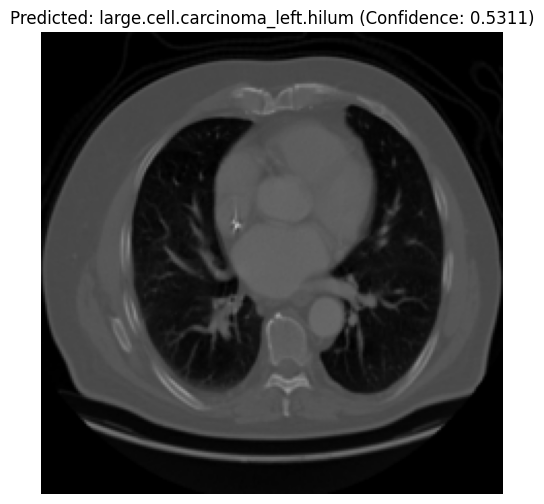

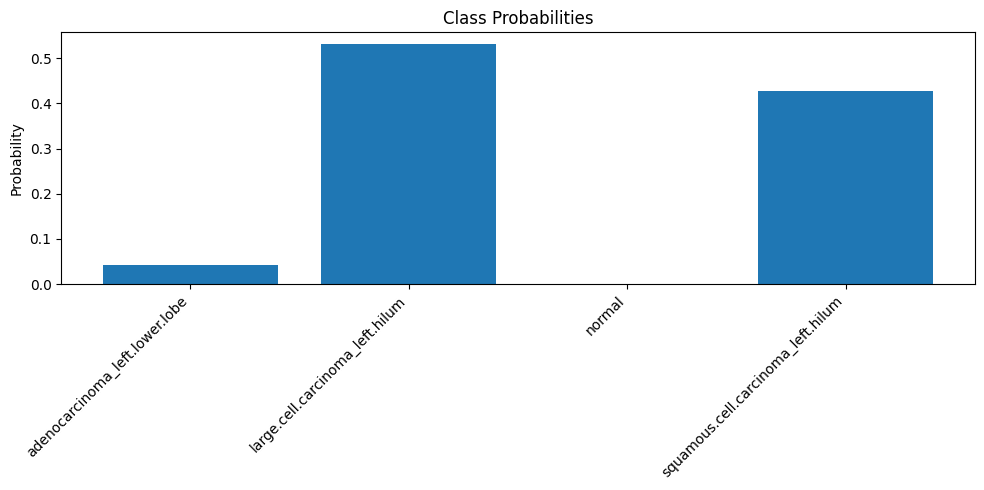

In [25]:
def load_and_prepare_model(model_path, num_classes=4, device='cpu'):
    """Load and prepare the model for inference"""
    # Initialize the model architecture
    model = resnet18(weights=None)  # No pre-trained weights needed here
    
    # Modify final layer for our classification task
    model.fc = nn.Sequential(
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(512, 256),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(256, num_classes)
    )
    
    # Load the saved weights
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.to(device)
    model.eval()
    
    return model

def predict_image(image_path, model, transform, class_names, device='cpu'):
    """Predict class for a single image"""
    # Open and preprocess the image
    image = Image.open(image_path).convert("RGB")
    image_tensor = transform(image).unsqueeze(0).to(device)
    
    # Make prediction
    with torch.inference_mode():
        outputs = model(image_tensor)
        probabilities = torch.softmax(outputs, dim=1)
        confidence, predicted_idx = torch.max(probabilities, dim=1)
        predicted_class = class_names[predicted_idx.item()]
        confidence = confidence.item()
    
    # Return results
    return {
        'class': predicted_class,
        'confidence': confidence,
        'probabilities': probabilities.squeeze().tolist(),
        'class_names': class_names
    }

# Load the model
inference_model = load_and_prepare_model(
    model_path="chest-ctscan_model.pth", 
    num_classes=len(class_names),
    device="cpu"
)

# Example usage
# Use a sample image from your test dataset
random_idx = torch.randint(0, len(test_data), size=(1,)).item()
img_tensor, label = test_data[random_idx]
img_class = class_names[label]

# Create a temporary file path for the example
import tempfile
import os
from torchvision.utils import save_image

# Create a temporary directory
temp_dir = tempfile.mkdtemp()
image_path = os.path.join(temp_dir, f"sample_{img_class}.png")

# Save the tensor as an image
img_to_save = denormalize(img_tensor.clone())
save_image(img_to_save, image_path)

print(f"Using sample image from class: {img_class}")
result = predict_image(
    image_path=image_path, 
    model=inference_model, 
    transform=eval_transform, 
    class_names=class_names,
    device="cpu"
)

# Display results
print(f"Predicted Class: {result['class']}")
print(f"Confidence: {result['confidence']:.4f}")

# Display the image with prediction
img = Image.open(image_path).convert("RGB")
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.title(f"Predicted: {result['class']} (Confidence: {result['confidence']:.4f})")
plt.axis('off')
plt.show()

# Display probability distribution
plt.figure(figsize=(10, 5))
plt.bar(class_names, result['probabilities'])
plt.title('Class Probabilities')
plt.ylabel('Probability')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Batch Prediction and Error Analysis

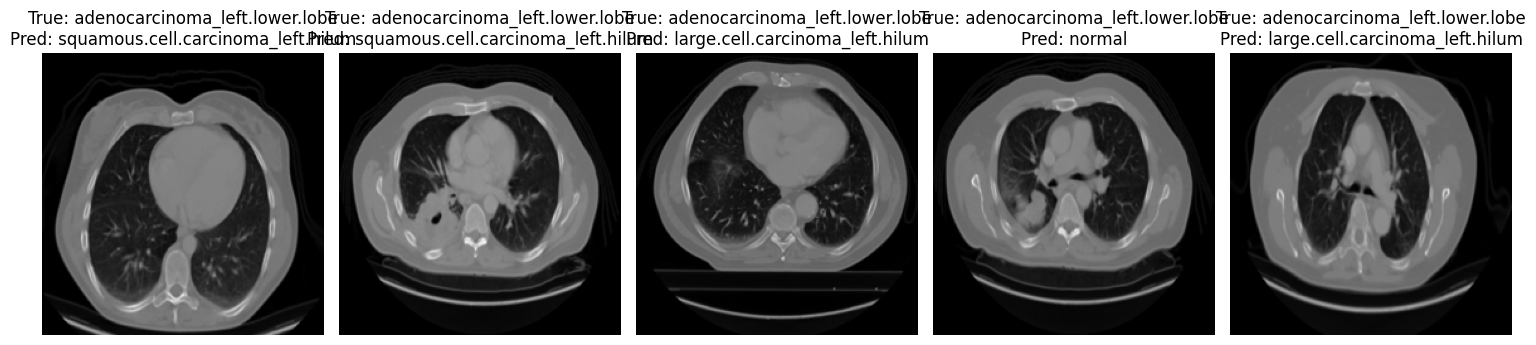

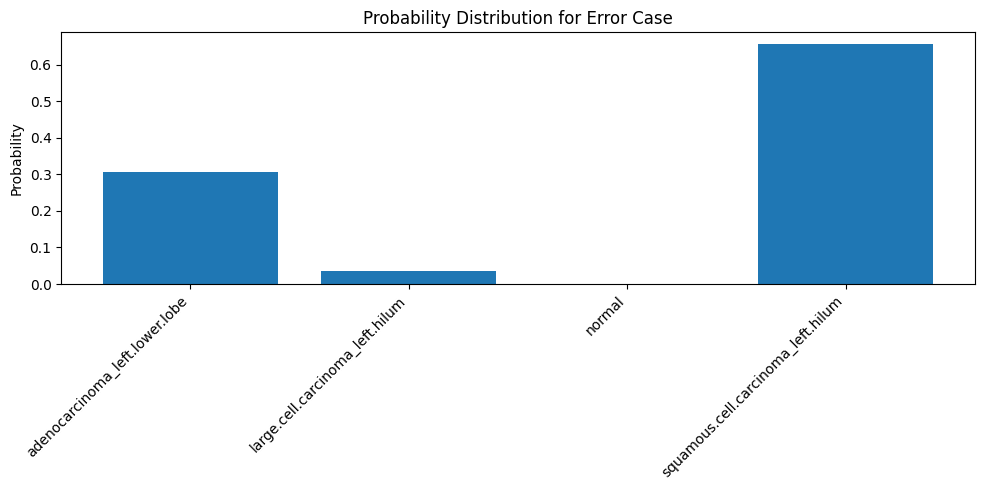

In [26]:
def analyze_errors(model, dataloader, class_names, device='cpu', num_samples=5):
    """Analyze and visualize prediction errors"""
    model.eval()
    errors = []
    
    with torch.inference_mode():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            
            # Find errors
            mask = (predicted != labels)
            if mask.any():
                error_indices = mask.nonzero(as_tuple=True)[0]
                for idx in error_indices:
                    if len(errors) >= num_samples:
                        break
                    errors.append({
                        'image': images[idx].cpu(),
                        'true': labels[idx].item(),
                        'pred': predicted[idx].item(),
                        'probs': torch.softmax(outputs[idx], dim=0).cpu().numpy()
                    })
            
            if len(errors) >= num_samples:
                break
    
    # Visualize errors
    if errors:
        fig, axes = plt.subplots(1, len(errors), figsize=(15, 5))
        if len(errors) == 1:
            axes = [axes]
            
        for i, error in enumerate(errors):
            # Denormalize image for visualization
            img = denormalize(error['image'])
            img = img.permute(1, 2, 0).clamp(0, 1).numpy()
            
            axes[i].imshow(img)
            axes[i].set_title(f"True: {class_names[error['true']]}\nPred: {class_names[error['pred']]}")
            axes[i].axis('off')
            
        plt.tight_layout()
        plt.show()
        
        # Display probability distributions for the first error
        plt.figure(figsize=(10, 5))
        plt.bar(class_names, errors[0]['probs'])
        plt.title(f'Probability Distribution for Error Case')
        plt.ylabel('Probability')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("No errors found in the samples examined.")

# Analyze prediction errors
analyze_errors(inference_model, test_dataloader, class_names, device="cpu")

In [27]:
print("Model training and evaluation completed successfully!")

Model training and evaluation completed successfully!
